In [1]:
import pandas as pd

data = pd.read_csv("data/train.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


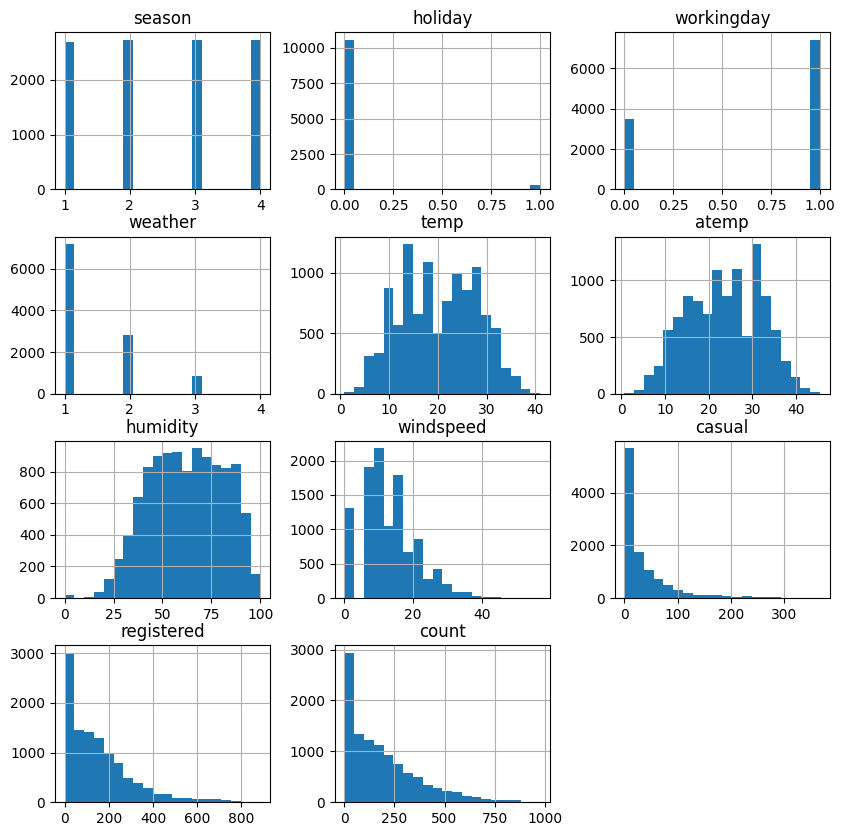

In [3]:
import matplotlib.pyplot as plt
data.hist(bins=20,figsize=(10,10))
plt.show()

In [4]:
#datetime
df = pd.DataFrame(data)
df['datetime'] = pd.to_datetime(df['datetime'])
min_datetime = df['datetime'].min()
df['time_since_start'] = ((df['datetime'] - min_datetime)/3600).dt.total_seconds().astype(int)

In [5]:
#separate data
from sklearn.model_selection import train_test_split

X_train = df[['time_since_start', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
y_train = df[['casual', 'registered', 'count']]

In [6]:
corr_matrix = df.corr()
corr_matrix['time_since_start'].sort_values(ascending=False)

datetime            1.000000
time_since_start    1.000000
season              0.480021
registered          0.314879
count               0.310187
atemp               0.181823
temp                0.180986
casual              0.172728
humidity            0.032856
holiday             0.010988
workingday         -0.003658
weather            -0.005048
windspeed          -0.086888
Name: time_since_start, dtype: float64

array([[<Axes: xlabel='time_since_start', ylabel='time_since_start'>,
        <Axes: xlabel='season', ylabel='time_since_start'>,
        <Axes: xlabel='holiday', ylabel='time_since_start'>,
        <Axes: xlabel='workingday', ylabel='time_since_start'>,
        <Axes: xlabel='weather', ylabel='time_since_start'>,
        <Axes: xlabel='temp', ylabel='time_since_start'>,
        <Axes: xlabel='atemp', ylabel='time_since_start'>,
        <Axes: xlabel='humidity', ylabel='time_since_start'>,
        <Axes: xlabel='windspeed', ylabel='time_since_start'>],
       [<Axes: xlabel='time_since_start', ylabel='season'>,
        <Axes: xlabel='season', ylabel='season'>,
        <Axes: xlabel='holiday', ylabel='season'>,
        <Axes: xlabel='workingday', ylabel='season'>,
        <Axes: xlabel='weather', ylabel='season'>,
        <Axes: xlabel='temp', ylabel='season'>,
        <Axes: xlabel='atemp', ylabel='season'>,
        <Axes: xlabel='humidity', ylabel='season'>,
        <Axes: xlabel='win

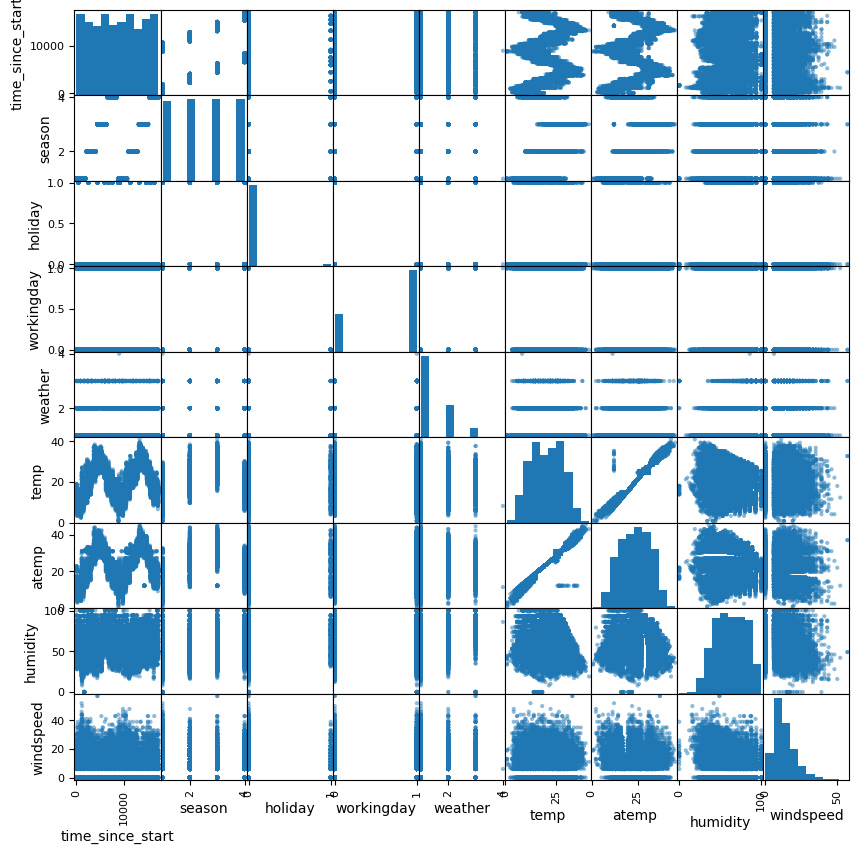

In [7]:
#visualize
from pandas.plotting import scatter_matrix

attributes1 = ['time_since_start', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed']
scatter_matrix(df[attributes1], figsize=(10,10))

array([[<Axes: xlabel='casual', ylabel='casual'>,
        <Axes: xlabel='registered', ylabel='casual'>,
        <Axes: xlabel='count', ylabel='casual'>],
       [<Axes: xlabel='casual', ylabel='registered'>,
        <Axes: xlabel='registered', ylabel='registered'>,
        <Axes: xlabel='count', ylabel='registered'>],
       [<Axes: xlabel='casual', ylabel='count'>,
        <Axes: xlabel='registered', ylabel='count'>,
        <Axes: xlabel='count', ylabel='count'>]], dtype=object)

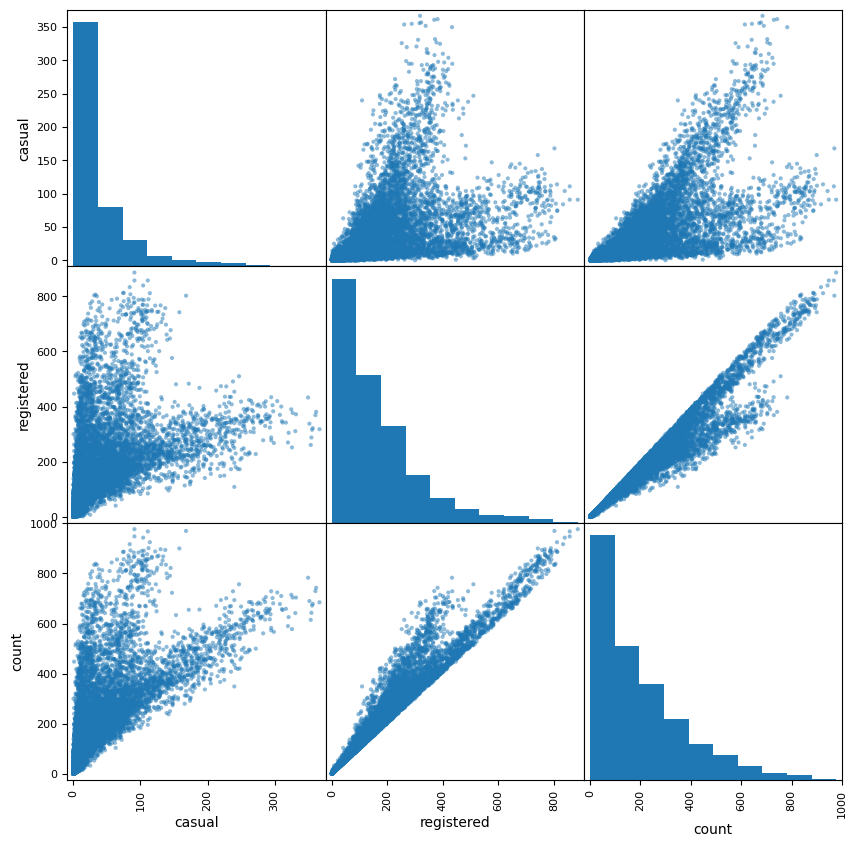

In [8]:
attributes2 = ['casual', 'registered', 'count']
scatter_matrix(df[attributes2], figsize=(10,10))

In [9]:
#prepare the data
#onehot
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
season_1hot = encoder.fit_transform(df[['season', 'weather']])

In [10]:
from sklearn.preprocessing import StandardScaler

#features = ['time_since_start', -'season', 'holiday', 'workingday', -'weather', 'temp', 'atemp', 'humidity', 'windspeed']

std_scaler = StandardScaler()
rest_std_scaled = std_scaler.fit_transform(df[['time_since_start', 'holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed']])

In [11]:
A = [season_1hot, rest_std_scaled]